* Yaqeen issa
* 1201576

#[Health Insurance Cost Prediction](https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction)

must do encode for nomenal in traning data and testing data

In [ ]:
import pandas as pd

df=pd.read_csv("/content/insurance.csv")

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


* Nominal: sex, smoker, region
* Ordinal: children
* Continuous: age, bmi, charges

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
y=df['charges']
X=df.drop(columns='charges')

In [ ]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train ,y_test=train_test_split(X,y,test_size=0.2,random_state=1201576)

In [ ]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [ ]:
Categori_cal=X_train.select_dtypes(include= [object]).columns.tolist()
Categori_cal

['sex', 'smoker', 'region']

**OneHotEncoder for Nominal features**




In [ ]:
from sklearn.preprocessing import OneHotEncoder
#Initialize OneHotEncoder
one_hot_encoder_cols=OneHotEncoder(sparse_output=False, handle_unknown="ignore")
encoder_train=one_hot_encoder_cols.fit_transform(X_train[Categori_cal])
encoder_test=one_hot_encoder_cols.transform(X_test[Categori_cal])
encoder_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       ...,
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.]])

In [ ]:
encoder_train_df=pd.DataFrame(encoder_train,columns=one_hot_encoder_cols.get_feature_names_out(Categori_cal))
encoder_test_df=pd.DataFrame(encoder_test,columns=one_hot_encoder_cols.get_feature_names_out(Categori_cal))
encoder_test_df.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


In [ ]:
encoder_train_df= X_train.drop(columns=Categori_cal).reset_index(drop=True)
encoder_test_df = X_test.drop(columns=Categori_cal).reset_index(drop=True)


,age,bmi,children
0,45,39.805,0
1,19,39.615,1
2,37,23.370,2
3,32,46.530,2
4,41,23.940,1
...,...,...,...
263,64,33.800,1
264,29,38.940,1
265,48,32.300,1
266,24,29.830,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize and fit StandardScaler on encoder_train_df
scaler = StandardScaler()
scaler.fit(encoder_train_df)

# Transform X_train and X_test using the fitted scaler
X_train_scaled = scaler.transform(encoder_train_df)
X_test_scaled = scaler.transform(encoder_test_df)


**Fit a Linear regression model**

how print the model parameters and provide an interpretation for each  

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize Linear Regression model
LRM = LinearRegression()

# Fit the model on scaled training data
LRM.fit(X_train_scaled, y_train)

# Predictions on training data
y_train_pred = LRM.predict(X_train_scaled)

# Predictions on test data
y_test_pred = LRM.predict(X_test_scaled)


In [ ]:
b_0 = LRM.intercept_.round(2)
b_i = LRM.coef_.round(2)

print(f"coffiecients (weights): {b_i}")
print(f"intercept (bias): {b_0}")

for feature, coef in zip(X.columns, b_i):
    print(f"{feature}: {coef:.2f}")

coffiecients (weights): [3375.4  1730.95  556.73]
intercept (bias): 13266.85
age: 3375.40
sex: 1730.95
bmi: 556.73


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
    # Get metrics
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r_squared = r2_score(y_true, y_pred)
    if verbose == True:
        # Print Result with Label and Header
        header = "-"*60
        print(header, f"Regression Metrics: {label}", header, sep='\n')
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
    if output_dict == True:
        metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}


the model has heigh MAN and

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate and print metrics for training data
results_train = regression_metrics(y_train, y_train_pred, label='Training Data')
print()

# Calculate and print metrics for test data
results_test = regression_metrics(y_test, y_test_pred, label='Test Data')


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 8,993.866
- MSE = 126,402,109.262
- RMSE = 11,242.869
- R^2 = 0.113

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 9,226.935
- MSE = 139,561,657.600
- RMSE = 11,813.622
- R^2 = 0.143



* model Underfiting bad in testing and traning data
1.    model too simple
2.   i know that from high value of MSE and MAE and Accurcy = zero



In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculate and print metrics for training data
results_train = regression_metrics(y_train, y_train_pred, label='Training Data')
print()

# Calculate and print metrics for test data
results_test = regression_metrics(y_test, y_test_pred, label='Test Data')


------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 8,993.866
- MSE = 126,402,109.262
- RMSE = 11,242.869
- R^2 = 0.113

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 9,226.935
- MSE = 139,561,657.600
- RMSE = 11,813.622
- R^2 = 0.143


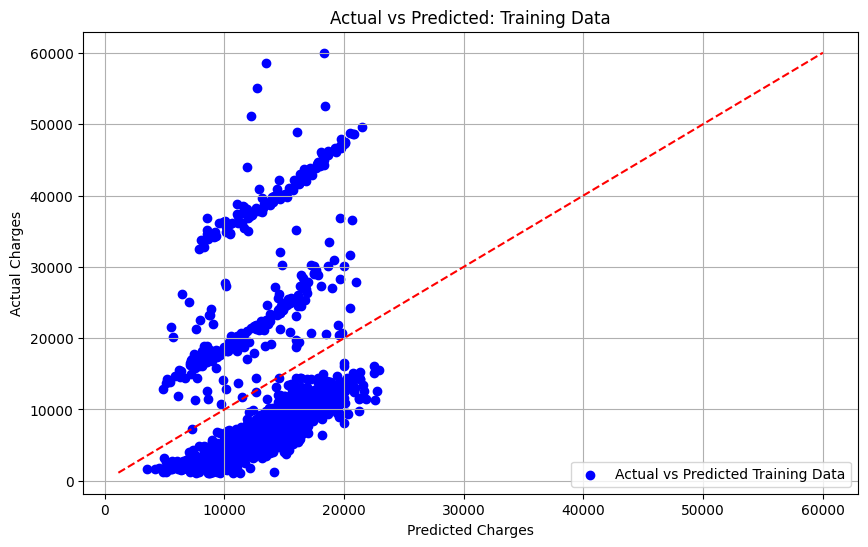

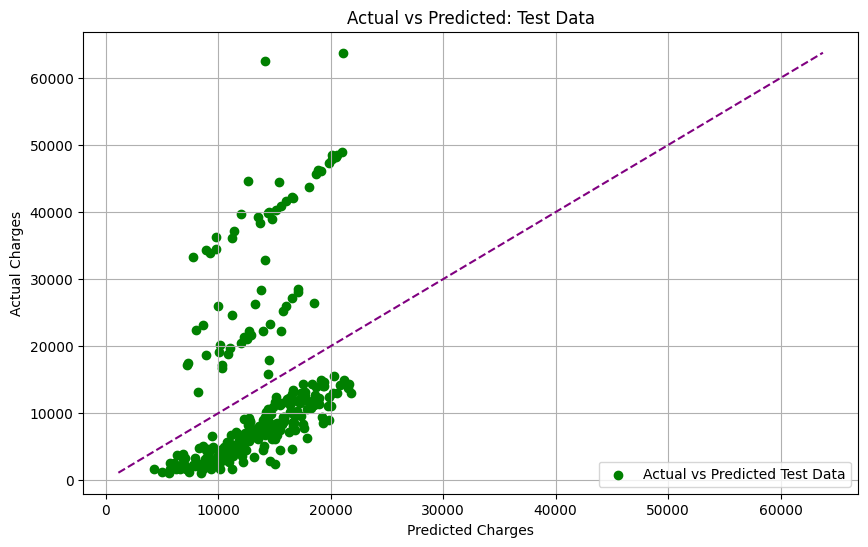

In [ ]:
import matplotlib.pyplot as plt

# Plotting the predictions vs actual values for Training Data
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, y_train, color='blue', label='Actual vs Predicted Training Data')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Actual vs Predicted: Training Data')
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the predictions vs actual values for Test Data
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, y_test, color='green', label='Actual vs Predicted Test Data')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='purple', linestyle='--')
plt.title('Actual vs Predicted: Test Data')
plt.xlabel('Predicted Charges')
plt.ylabel('Actual Charges')
plt.legend()
plt.grid(True)
plt.show()


vertical space betwen point and line => represent error

in the plot show outliers  => incresing error and minmize the Acurcy